<a href="https://colab.research.google.com/github/Zaxis018/Data-Mining/blob/main/PCA/PCA_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PCA on Fashion-MNIST dataset**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Display some information about the dataset
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


4422102/4422102 [==============================] - 0s 0us/step
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [3]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [4]:
all_labels = list(train_labels)
unique_labels = np.unique(all_labels)
print(all_labels)
print(unique_labels)

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8, 8, 0, 1, 1, 6, 8, 1, 9, 7, 8, 8, 9, 6, 6, 3, 1, 5, 4, 6, 7, 5, 5, 9, 2, 2, 2, 7, 6, 4, 1, 8, 7, 7, 5, 4, 2, 9, 1, 7, 4, 6, 9, 7, 1, 8, 7, 1, 2, 8, 0, 9, 1, 8, 7, 0, 5, 8, 6, 7, 2, 0, 8, 7, 1, 6, 2, 1, 9, 6, 0, 1, 0, 5, 5, 1, 7, 0, 5, 8, 4, 0, 4, 0, 6, 6, 4, 0, 0, 4, 7, 3, 0, 5, 8, 4, 1, 1, 2, 9, 2, 8, 5, 0, 6, 3, 4, 6, 0, 9, 1, 7, 3, 8, 5, 8, 3, 8, 5, 2, 0, 8, 7, 0, 3, 5, 0, 6, 5, 2, 7, 5, 2, 6, 8, 2, 6, 8, 0, 4, 4, 4, 4, 4, 1, 5, 6, 5, 3, 3, 7, 3, 3, 6, 2, 8, 4, 6, 5, 9, 3, 2, 3, 2, 4, 4, 8, 2, 5, 3, 0, 7, 2, 0, 2, 5, 7, 2, 3, 1, 7, 6, 2, 9, 1, 9, 1, 1, 8, 7, 8, 4, 2, 6, 6, 7, 9, 4, 6, 1, 9, 5, 6, 0, 5, 0, 1, 6, 1, 1, 6, 7, 4, 4, 8, 6, 4, 6, 9, 3, 7, 5, 0, 8, 3, 4, 0, 3, 3, 2, 0, 1, 0, 3, 

In [5]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
unique_labels_strings = [class_names[label] for label in unique_labels]
unique_labels_strings

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [37]:
def plot_image(image,index):
  selected_image = image

  # Plot the image
  plt.imshow(selected_image, cmap='gray')
  plt.colorbar()
  plt.text(27, -1.2, 'Kshitiz_Poudel', color='red', backgroundcolor='gray')


  # Display the plot
  plt.show()
  print('label=',class_names[train_labels[index]])

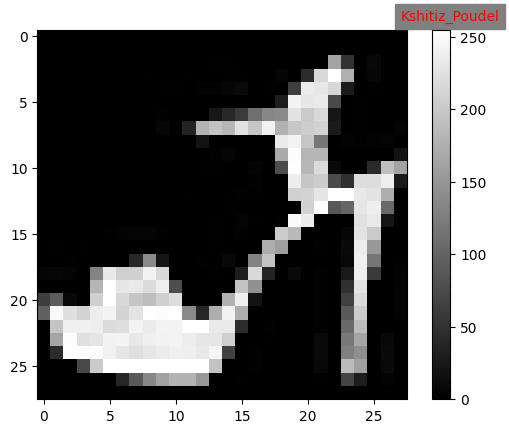

label= Sandal


In [38]:
plot_image(train_images[9],9)

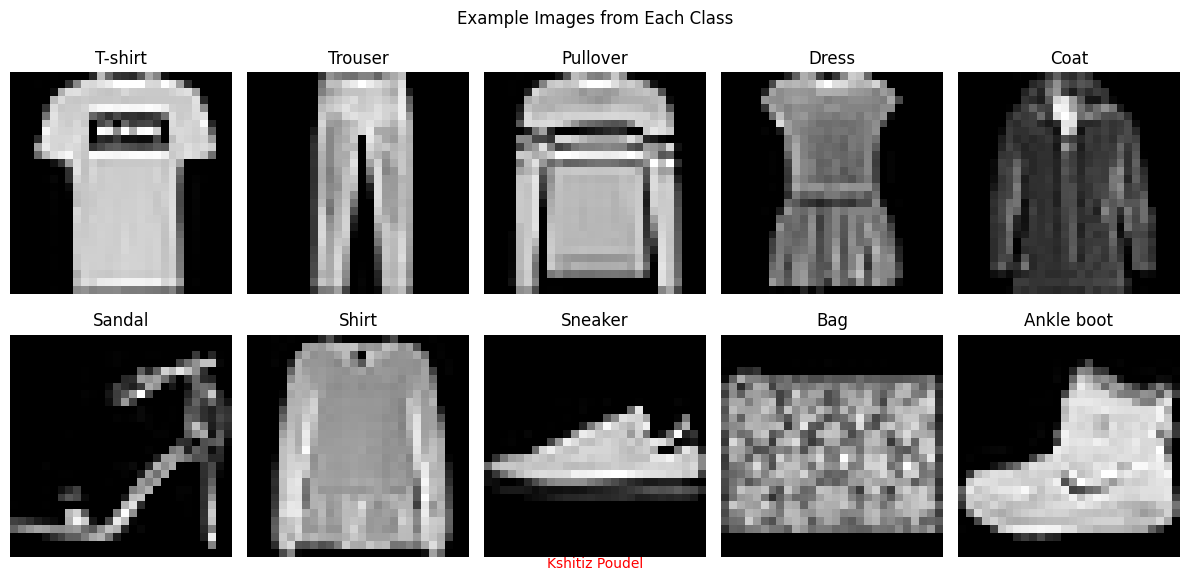

In [41]:
# Create a subplot grid
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Example Images from Each Class')

# Iterate over each class
for i, ax in enumerate(axs.flat):
    # Find an example image for the current class
    idx = np.where(train_labels == i)[0][0]
    image = train_images[idx]

    # Plot the image and set the title
    ax.imshow(image, cmap='gray')
    ax.set_title(class_names[i])
    ax.axis('off')

extra_legend = "Kshitiz Poudel"
fig.text(0.5, 0.05, extra_legend, ha='center',color='red')

plt.tight_layout()
plt.show()


In [42]:
#Normalize pixel values
x_train = train_images / 255.0
x_test = test_images / 255.0


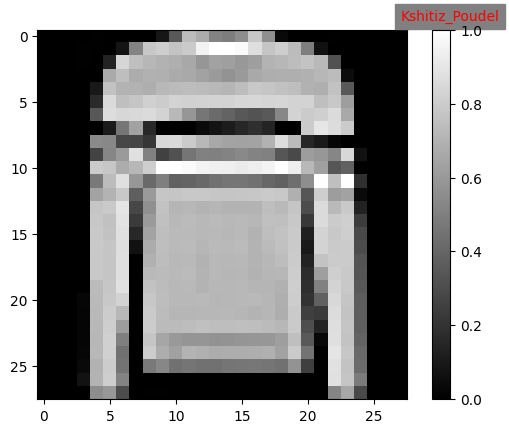

label= Pullover


In [43]:
plot_image((train_images[5].reshape(28,28)/255),5)

In [44]:

print(x_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [45]:
x_train.shape

(60000, 28, 28)

In [46]:
#reshape the x_train from (60000, 28, 28) to (60000,784) data matrix

x_train = x_train.reshape(60000, 784)

##PCA

**Step 1:Subtract mean values of each dimensions (columns)**

In [47]:
mean = np.mean(x_train, axis=0)
x_train = x_train - mean
x_train[4]

array([-3.13725490e-06, -2.26797386e-05, -1.17973856e-04, -4.07058824e-04,
       -9.79150327e-04, -1.62633987e-03, -3.22222222e-03, -8.72444444e-03,
       -2.23477124e-02, -5.66064706e-02, -1.29239020e-01, -1.80072810e-01,
       -2.04284706e-01, -1.99492484e-01, -1.98128889e-01, -2.11397712e-01,
       -2.02067778e-01, -5.74637908e-02, -1.02428889e-01, -4.08181046e-02,
       -1.61122876e-02, -7.76346405e-03, -4.63261438e-03, -3.33450980e-03,
       -1.87000000e-03, -1.02065359e-03, -3.82941176e-04, -6.59477124e-05,
       -2.79084967e-05, -9.43137255e-05, -3.95620915e-04, -1.42718954e-03,
       -3.01934641e-03, -8.17150327e-03, -2.88511111e-02, -6.87690196e-02,
        6.15508039e-01,  6.00278627e-01,  4.20778889e-01, -2.67280850e-01,
       -4.43457320e-01, -4.36227843e-01, -4.27772288e-01, -3.47825229e-01,
        4.17316013e-01,  5.28814837e-01,  4.87354444e-01, -1.33857124e-01,
       -1.02619150e-01, -5.34571242e-02, -2.42860784e-02, -1.36563399e-02,
       -8.66692810e-03, -

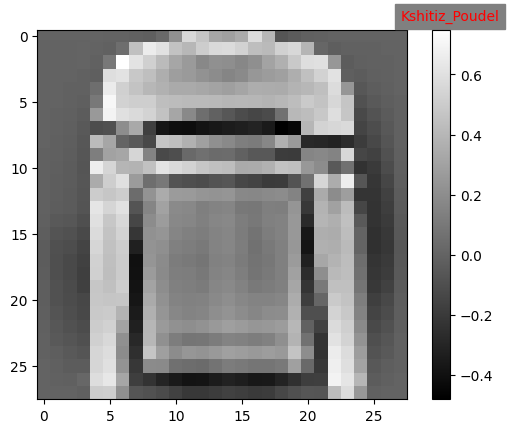

label= Pullover


In [48]:
#same image plotted after subtracting mean values
plot_image(x_train[5].reshape(28,28),5)

**step 2: Calculate covariance matrix of data matrix**

In [49]:
x_train.shape

(60000, 784)

In [50]:
mean.shape

(784,)

In [51]:
#size of data matrix=(60000, 784)
#so covariance matrix size must be 784*784

# Calculate the covariance matrix
cov_matrix = np.cov(x_train, rowvar=False)

print("Covariance matrix shape:", cov_matrix.shape)

Covariance matrix shape: (784, 784)


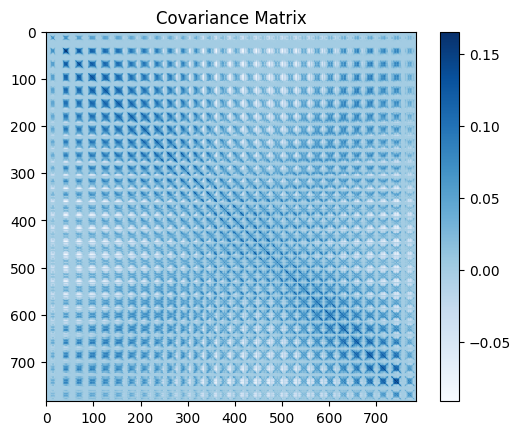

In [52]:
#visualizing the covariance matrix

plt.imshow(cov_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Covariance Matrix')
plt.show()

**Step 3: calculate eigenvectors and eigenvalues of covariance matrix**

In [53]:
##calculated using numpy library

# Calculate the eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and corresponding eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]  # Reverse the order to sort in descending order
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [54]:
eigenvectors.shape

(784, 784)

**Step 4: select top k eigenvectors as basis vectors**

In [55]:
# Select the top k eigenvectors as basis

k = 50  # Replace with the desired number of eigenvectors
selected_eigenvectors = eigenvectors[:, :k]

print(selected_eigenvectors.shape)

(784, 50)


Step 4.1: plotting the eigenimages(top eigenvectors)



---



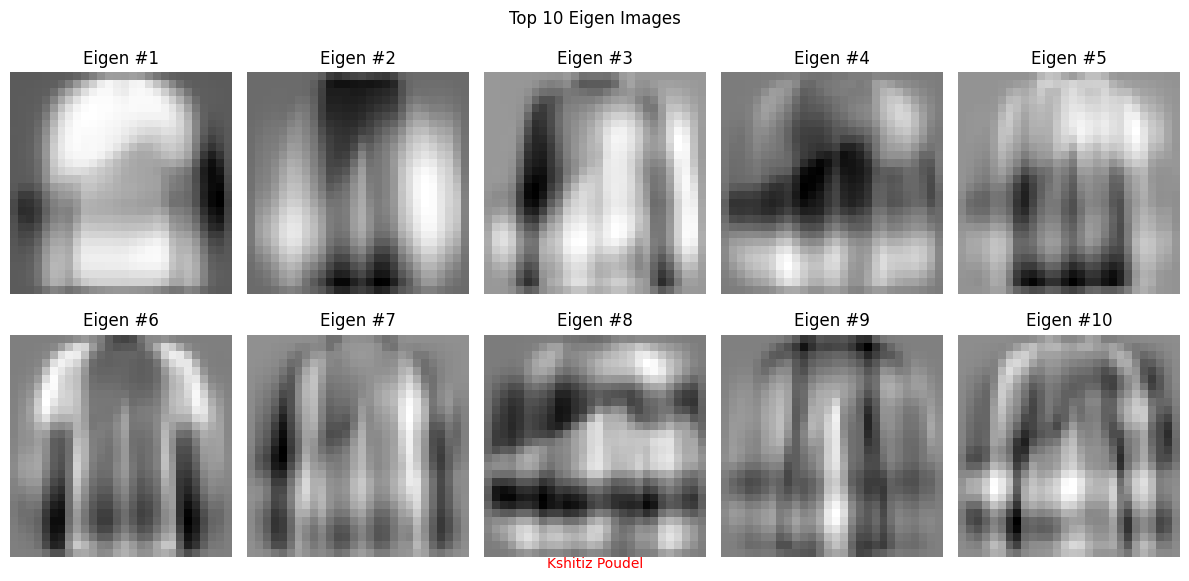

In [57]:
# Select the top 10 eigen vectors
top_10_eigen_vectors = eigenvectors[:, :10]
top_10_transposed = np.transpose(top_10_eigen_vectors)

# Create a subplot grid for displaying the eigen images
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Top 10 Eigen Images')

# Iterate over the top 5 eigen vectors
for i, ax in enumerate(axs.flat):
    eigen_image = np.real(top_10_transposed[i].reshape((28, 28)))
    ax.imshow(eigen_image, cmap='gray')
    ax.set_title(f"Eigen #{i+1}")
    ax.axis('off')

extra_legend = "Kshitiz Poudel"
fig.text(0.5, 0.05, extra_legend, ha='center',color='red')
# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


Step 4.2: calculate proportion of variance

In [58]:
#proportion of variance of each eigenvalue
pov_list=[]
for i in range (0,784):
  pov=eigenvalues[i]/sum(eigenvalues)
  pov_list.append(pov)

In [59]:
#print incremental proportion of variance
#calculating the proporiton of
proportion_of_variance_list=[]
for k in range (0,784):
  selected_eigenvalues = eigenvalues[:k]
  proportion_of_variance=sum(selected_eigenvalues)/sum(eigenvalues)
  proportion_of_variance_list.append(proportion_of_variance)

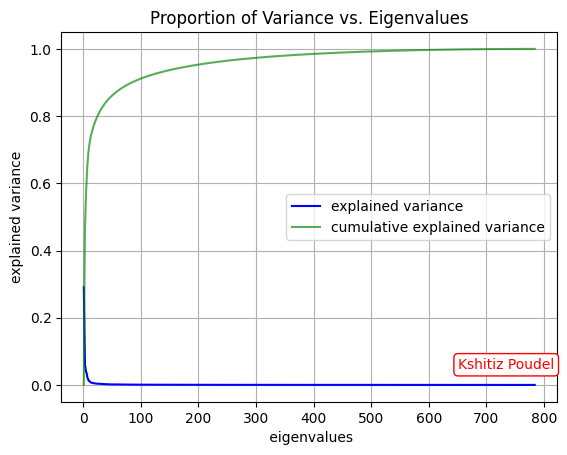

In [61]:
import matplotlib.pyplot as plt

x = range(1, 785)
plt.plot(x, pov_list, color="blue", label='explained variance', alpha=1)
plt.plot(x, proportion_of_variance_list, color="green", label='cumulative explained variance', alpha=0.65)
plt.grid()

# Set the axis labels
plt.xlabel(' eigenvalues')
plt.ylabel('explained variance')
plt.title('Proportion of Variance vs. Eigenvalues')

# Add extra legend for roll numbers
extra_legend = "Kshitiz Poudel"
plt.text(0.8,0.1 , extra_legend, ha='left', va='center', color='red', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round'))

plt.legend()

plt.show()


In [62]:
print((pov_list))

[0.29039227921366045, 0.17755309978162218, 0.06019221983168988, 0.0495742800370058, 0.03847655147905938, 0.03460769317993573, 0.023416905224209313, 0.019054136299307196, 0.01349843441337764, 0.01314267091789994, 0.00992875162404591, 0.00913254895440229, 0.007657925630550661, 0.006597055757215323, 0.006078507035238123, 0.005898214761096286, 0.005519342867557479, 0.005244998330281344, 0.0045807892155500796, 0.0045551472827665505, 0.00433683560903821, 0.0040709745984038575, 0.003847580021798502, 0.003725514008436749, 0.003611066812409738, 0.0035065619327725546, 0.003332411746963162, 0.0031935978505746206, 0.0030806272923427983, 0.002932728699639459, 0.00275602713195537, 0.0026506193429553463, 0.002637033618730872, 0.002558353108103414, 0.0024621227622018222, 0.0023590127129748096, 0.002302899127535972, 0.0022552235271964243, 0.002184759665429262, 0.0020932408073242475, 0.0020028240732768935, 0.001957396583323364, 0.0019468934681892073, 0.0018278318199354009, 0.0017535423769560019, 0.00171

**Step 5: Deriving the new dataset(data_matrix)**

FinalData=RowFeatureVector * RowZeroMeanData

In [63]:
#def get_final_data(no_of_eigenvectors):
  #selected_eigenvectors=eigenvectors[:, :no_of_eigenvectors]
  #row_zero_mean_data= np.transpose(x_train)
  #print('original dataset size = ',row_zero_mean_data.shape) #original data= (60000 x 784), transposed= (784 X 60000)

  #row_feature_vector=np.transpose(selected_eigenvectors)
  #print('shape of eigenvector matrix row-wise =',row_feature_vector.shape)#eigen vectors rowwise

  #final_data= np.transpose(row_feature_vector @ row_zero_mean_data)
  #print('final data shape =',final_data.shape) # final data plotted only in the top j principal components discarding other dimensions
  #return final_data

In [64]:
#final_data={}
#for j in range (1,51):
 # final_data[j]=get_final_data(j)

In [65]:
#for calculating final data for each number of selected input vectors, loop
final_data={}
for j in range (1,51):
  print('If   %s  principal components(eigenvectors) is/are used'%(j))
  selected_eigenvectors=eigenvectors[:, :j]
  row_zero_mean_data= np.transpose(x_train)
  print('original dataset size = ',row_zero_mean_data.shape) #original data= (60000 x 784), transposed= (784 X 60000)

  row_feature_vector=np.transpose(selected_eigenvectors)
  print('shape of eigenvector matrix row-wise =',row_feature_vector.shape)#eigen vectors rowwise

  final_data[j] = np.transpose(row_feature_vector @ row_zero_mean_data)
  print('final data shape =',final_data[j].shape) # final data plotted only in the top j principal components discarding other dimensions
  print()

If   1  principal components(eigenvectors) is/are used
original dataset size =  (784, 60000)
shape of eigenvector matrix row-wise = (1, 784)
final data shape = (60000, 1)

If   2  principal components(eigenvectors) is/are used
original dataset size =  (784, 60000)
shape of eigenvector matrix row-wise = (2, 784)
final data shape = (60000, 2)

If   3  principal components(eigenvectors) is/are used
original dataset size =  (784, 60000)
shape of eigenvector matrix row-wise = (3, 784)
final data shape = (60000, 3)

If   4  principal components(eigenvectors) is/are used
original dataset size =  (784, 60000)
shape of eigenvector matrix row-wise = (4, 784)
final data shape = (60000, 4)

If   5  principal components(eigenvectors) is/are used
original dataset size =  (784, 60000)
shape of eigenvector matrix row-wise = (5, 784)
final data shape = (60000, 5)

If   6  principal components(eigenvectors) is/are used
original dataset size =  (784, 60000)
shape of eigenvector matrix row-wise = (6, 784)

In [66]:
final_data[6]

array([[-0.48625016,  6.40421332,  4.74918114,  0.94428674,  0.01313079,
        -1.58564884],
       [ 5.52128962, -1.77114249,  1.02363543,  1.43700665, -0.84485317,
         4.97718897],
       [-2.846709  , -4.32093387, -0.41629115,  0.82365373,  0.41224713,
        -0.20947938],
       ...,
       [ 3.36372626, -4.62839288,  2.04193723, -1.71378525, -0.34010641,
        -0.25472709],
       [-3.16657461, -2.2792897 , -1.88360748,  1.61877708,  0.46405805,
         1.82380527],
       [-7.12025023, -0.46958174, -1.83887764,  0.3089207 , -0.23297105,
         0.07302859]])

Plotting covariance matrix of new data

In [67]:
cov_matrix_new={}
for data in range(1,51):
  new_matrix = np.cov(final_data[data], rowvar=False)
  cov_matrix_new[data]=new_matrix
  # Print the shape of the covariance matrix
  print("Covariance matrix shape:", new_matrix.shape)

Covariance matrix shape: ()
Covariance matrix shape: (2, 2)
Covariance matrix shape: (3, 3)
Covariance matrix shape: (4, 4)
Covariance matrix shape: (5, 5)
Covariance matrix shape: (6, 6)
Covariance matrix shape: (7, 7)
Covariance matrix shape: (8, 8)
Covariance matrix shape: (9, 9)
Covariance matrix shape: (10, 10)
Covariance matrix shape: (11, 11)
Covariance matrix shape: (12, 12)
Covariance matrix shape: (13, 13)
Covariance matrix shape: (14, 14)
Covariance matrix shape: (15, 15)
Covariance matrix shape: (16, 16)
Covariance matrix shape: (17, 17)
Covariance matrix shape: (18, 18)
Covariance matrix shape: (19, 19)
Covariance matrix shape: (20, 20)
Covariance matrix shape: (21, 21)
Covariance matrix shape: (22, 22)
Covariance matrix shape: (23, 23)
Covariance matrix shape: (24, 24)
Covariance matrix shape: (25, 25)
Covariance matrix shape: (26, 26)
Covariance matrix shape: (27, 27)
Covariance matrix shape: (28, 28)
Covariance matrix shape: (29, 29)
Covariance matrix shape: (30, 30)
Co

In [68]:
cov_matrix_new[2].shape

(2, 2)

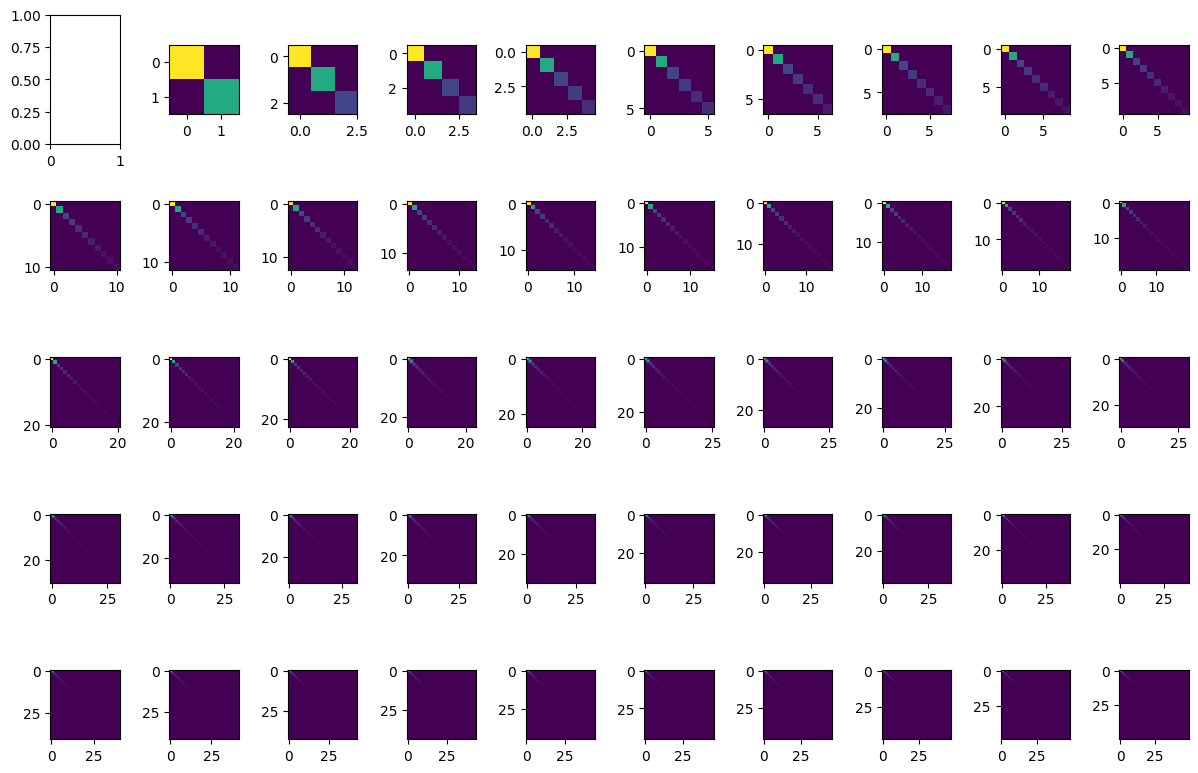

In [69]:
# Create a figure and subplots
fig, axs = plt.subplots(5, 10, figsize=(12, 8))


# Iterate over the covariance matrices and plot them in subplots
for i in range(2,51):
    if cov_matrix_new[i].shape == ():
      continue  # Skip the 1x1 covariance matrix
    ax=plt.subplot(5,10,i)
    plt.imshow(cov_matrix_new[i])

# Adjust the spacing between subplots
fig.tight_layout()

plt.show()


##Reconstruction of original data from transformed data

In [70]:
print(mean)
print(mean.shape)

[3.13725490e-06 2.26797386e-05 1.17973856e-04 4.07058824e-04
 9.79150327e-04 1.62633987e-03 3.22222222e-03 8.72444444e-03
 2.23477124e-02 5.66064706e-02 1.29239020e-01 1.80072810e-01
 2.04284706e-01 1.99492484e-01 1.98128889e-01 2.11397712e-01
 2.02067778e-01 1.59424575e-01 1.02428889e-01 4.08181046e-02
 1.61122876e-02 7.76346405e-03 4.63261438e-03 3.33450980e-03
 1.87000000e-03 1.02065359e-03 3.82941176e-04 6.59477124e-05
 2.79084967e-05 9.43137255e-05 3.95620915e-04 1.42718954e-03
 3.01934641e-03 8.17150327e-03 2.88511111e-02 6.87690196e-02
 1.25668431e-01 2.07564510e-01 3.12554444e-01 3.92771046e-01
 4.43457320e-01 4.36227843e-01 4.27772288e-01 4.49786013e-01
 4.33664379e-01 3.57459673e-01 2.81273007e-01 1.76994379e-01
 1.02619150e-01 5.34571242e-02 2.42860784e-02 1.36563399e-02
 8.66692810e-03 4.73875817e-03 1.83477124e-03 3.27254902e-04
 1.02483660e-04 3.18235294e-04 1.04516340e-03 2.84457516e-03
 8.26013072e-03 3.72037255e-02 9.04077124e-02 1.36891569e-01
 1.94701634e-01 2.798699

In [71]:
# Perform inverse transform and reconstruct the data
def inverse_transform(transformed_data, k_eigenvectors, mean):#mean of  original data column-wise
    # Step 1: Multiply the transformed data by the transpose of the eigenvectors
    # transformed data shape = (60000,k) where k=1,2,3,4....784

    inverse_transformed_data = np.dot(transformed_data, k_eigenvectors.T)

    # Step 2: Add the mean vector to the result
    reconstructed_data = inverse_transformed_data + mean

    return reconstructed_data

In [72]:
reconstructed_data={}
for no_of_pcs in range(6,52,5):
  print('WHEN RECONSTRUCTED FROM %s  PRINCIPAL COMPONENTS(EIGENVECTORS) '%(no_of_pcs-1))
  print()
  reconstructed_data[no_of_pcs-1]=(inverse_transform(np.array(final_data[no_of_pcs-1]),eigenvectors[:, :no_of_pcs-1],mean))
  print(inverse_transform(np.array(final_data[no_of_pcs-1]),eigenvectors[:, :no_of_pcs-1],mean))
  print()


WHEN RECONSTRUCTED FROM 5  PRINCIPAL COMPONENTS(EIGENVECTORS) 

[[-5.94358883e-07  5.66272015e-05  1.48818360e-04 ...  3.38182990e-02
   1.45223101e-02  1.21257100e-03]
 [ 4.19917943e-06  5.04947921e-05  2.62776185e-04 ...  1.94739788e-02
   6.64028912e-03  5.82713665e-04]
 [ 4.11903022e-06  1.06332027e-05  8.20286740e-05 ...  3.12298326e-03
   1.43964815e-03  3.60859441e-05]
 ...
 [ 2.82686720e-06 -3.35978040e-06  3.51160058e-05 ... -7.05893791e-03
  -2.21808998e-03 -1.30171494e-04]
 [ 4.77426198e-06  2.53420405e-05  1.47066393e-04 ...  1.18341316e-02
   3.50981952e-03  2.01881453e-04]
 [ 3.07291982e-06  6.98479549e-06  3.31172888e-05 ...  2.17583861e-03
   1.03521991e-03  8.42560873e-05]]

WHEN RECONSTRUCTED FROM 10  PRINCIPAL COMPONENTS(EIGENVECTORS) 

[[-3.07502328e-06  3.72967741e-05 -4.01176687e-05 ...  2.25697016e-02
   1.08996276e-02  9.52914528e-04]
 [ 6.81046368e-06  7.83410963e-05  7.30419104e-04 ...  1.98877319e-02
   4.13196599e-03  2.01679773e-04]
 [ 1.80992796e-06  5.453

In [73]:
reconstructed_data[1]=inverse_transform(np.array(final_data[1]),eigenvectors[:, :1],mean)

In [ ]:
len(reconstructed_data)

11

In [74]:
print(reconstructed_data[1].shape,reconstructed_data[5].shape,reconstructed_data[15].shape,reconstructed_data[20].shape,reconstructed_data[50].shape)


(60000, 784) (60000, 784) (60000, 784) (60000, 784) (60000, 784)


##comparing original data and reconstructed data

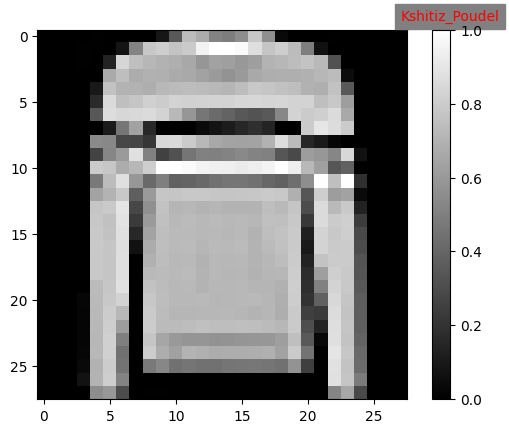

label= Pullover


In [75]:
#original image
plot_image((train_images[5]/255).reshape(28,28),5)

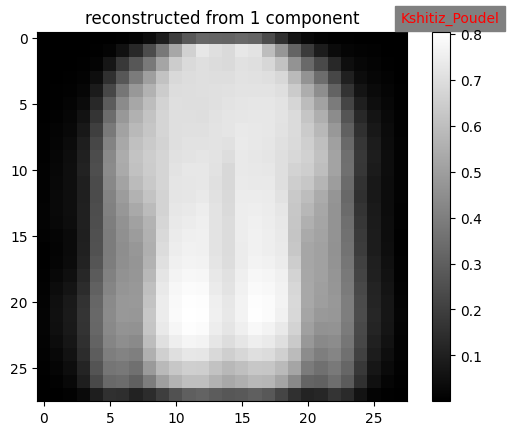

label= Pullover


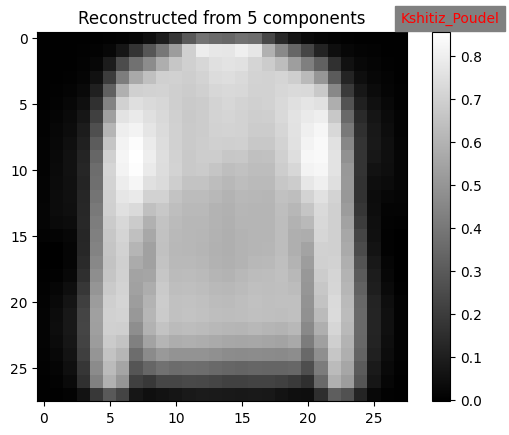

label= Pullover


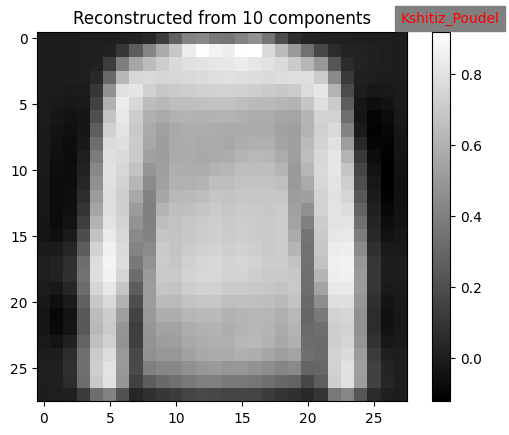

label= Pullover


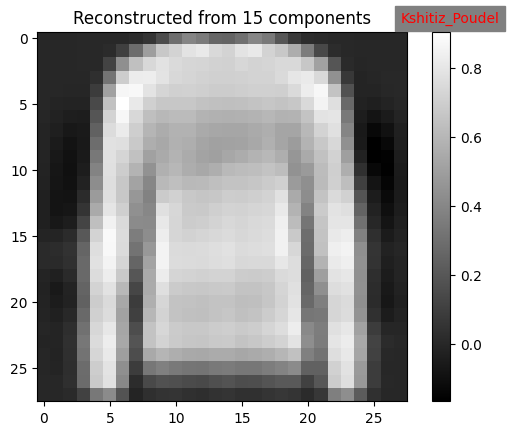

label= Pullover


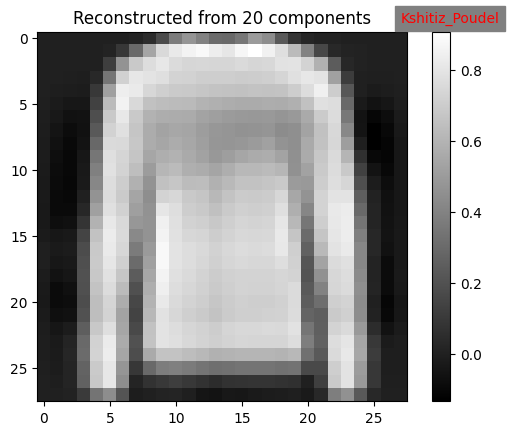

label= Pullover


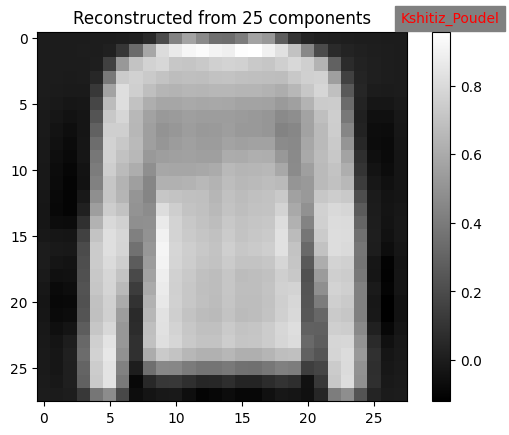

label= Pullover


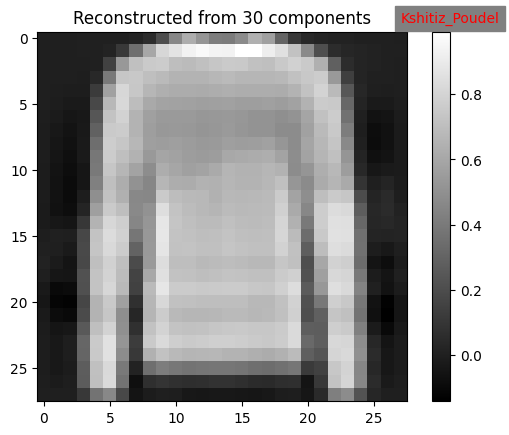

label= Pullover


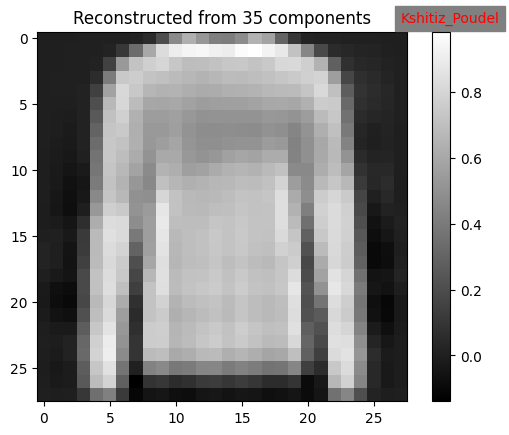

label= Pullover


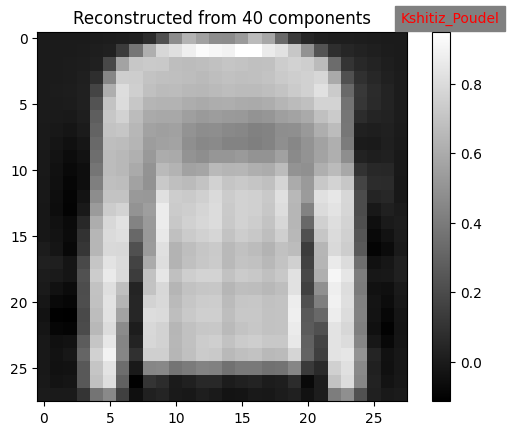

label= Pullover


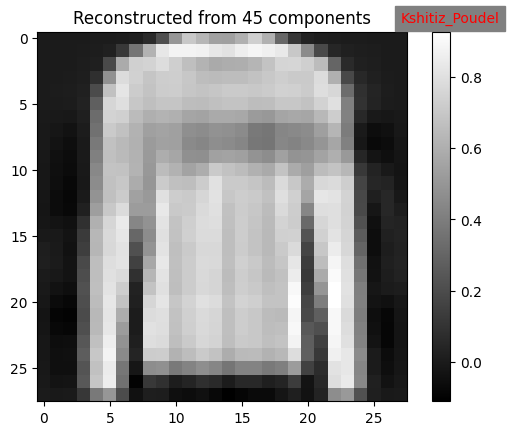

label= Pullover


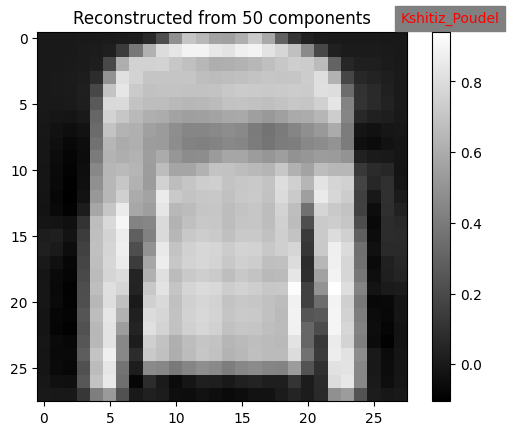

label= Pullover


In [76]:
plt.title('reconstructed from 1 component')
plot_image(reconstructed_data[1][5].reshape(28,28),5)

for b in range(5,51,5):
  plt.title(f'Reconstructed from {b} components')
  plot_image(reconstructed_data[b][5].reshape(28,28),5)


In [77]:
#calculating the reconstruction loss
from sklearn.metrics import mean_squared_error
mse_values=[]

for no_of_pcs_used in range(0,51,5):
  if no_of_pcs_used==0:
    mse = mean_squared_error(x_train, reconstructed_data[1])
    mse_values.append(mse)
  else:
    mse = mean_squared_error(x_train, reconstructed_data[no_of_pcs_used])
    mse_values.append(mse)

print(mse_values)

[0.18117815219099082, 0.15283045413432209, 0.1438057351571373, 0.1403779734117996, 0.13813323272974928, 0.136428524808131, 0.13503236003803035, 0.13389564081238114, 0.132921546031308, 0.13209594756728424, 0.13138207224871448]


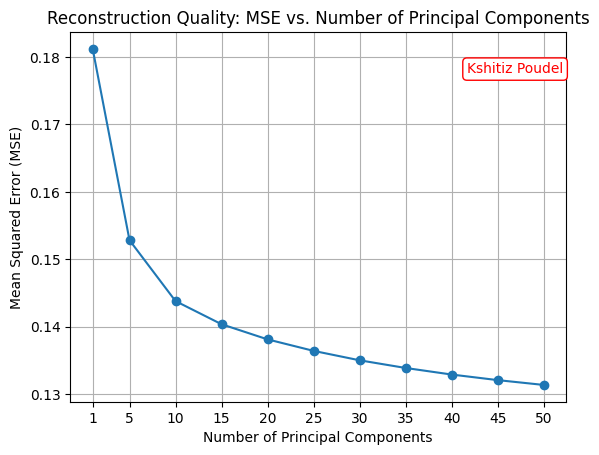

In [79]:
no_of_components=[1,5,10,15,20,25,30,35,40,45,50]
plt.plot(no_of_components, mse_values, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Reconstruction Quality: MSE vs. Number of Principal Components')

extra_legend = "Kshitiz Poudel"
plt.text(0.8,0.9, extra_legend, ha='left', va='center', color='red', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round'))

plt.xticks(no_of_components)
plt.grid(True)
plt.show()

##Now lets train the new dataset with simple feed forward network

In [80]:
import tensorflow as tf
data_tensor = tf.convert_to_tensor(final_data[25], dtype=tf.float32)# 50 can be replaced with any pcs

# Print the shape of the tensor
print(data_tensor.shape)

(60000, 25)


In [81]:
import sklearn as sk
import keras
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(25,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
model.fit(data_tensor,train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.4653 - accuracy: 0.8315
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3711 - accuracy: 0.8642
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3446 - accuracy: 0.8722
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3265 - accuracy: 0.8793
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3115 - accuracy: 0.8849


In [83]:
## Now convert the test dataset through the same pipeline to convert it into 50 dimensions instead of 784
x_test = test_images.reshape(10000, 784)
mean_test = np.mean(x_test, axis=0)
x_test= x_test- mean_test
row_zero_mean_test_data= np.transpose(x_test)

selected_eigenvectors_test=eigenvectors[:, :25]
row_feature_vector_test=np.transpose(selected_eigenvectors_test)

final_test_data = row_feature_vector_test @ row_zero_mean_test_data
final_test_data=np.transpose(final_test_data)

test_data_tensor=tf.convert_to_tensor(final_test_data, dtype=tf.float32)

In [84]:
#evaluate the test data
test_loss, test_acc = model.evaluate(test_data_tensor,test_labels)
print('Test accuracy:', test_acc)
print('Test Loss:', test_loss)


313/313 [==============================] - 1s 2ms/step - loss: 78.4146 - accuracy: 0.8424
Test accuracy: 0.8424000144004822
Test Loss: 78.41459655761719


In [85]:
predicted_probabilities=model.predict(test_data_tensor)

313/313 [==============================] - 1s 2ms/step


In [86]:

# Convert probabilities to class labels
predicted_labels = np.argmax(predicted_probabilities, axis=1)

print(predicted_labels)

[9 2 1 ... 8 1 5]


In [87]:
print(test_labels)

[9 2 1 ... 8 1 5]


In [88]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[903   0  14  19   5   8  46   0   5   0]
 [ 12 953   0  25   3   3   3   0   1   0]
 [ 26   1 759  12 156   3  39   0   4   0]
 [ 44   4   8 893  20   3  25   0   3   0]
 [  4   0  67  59 834   7  27   0   2   0]
 [  0   0   0   0   0 971   0  20   0   9]
 [244   0 135  28 178   9 394   0  12   0]
 [  0   0   0   0   0 116   0 853   0  31]
 [  8   0   8   4   3  27   0   4 943   3]
 [  0   0   0   0   0  40   0  39   0 921]]


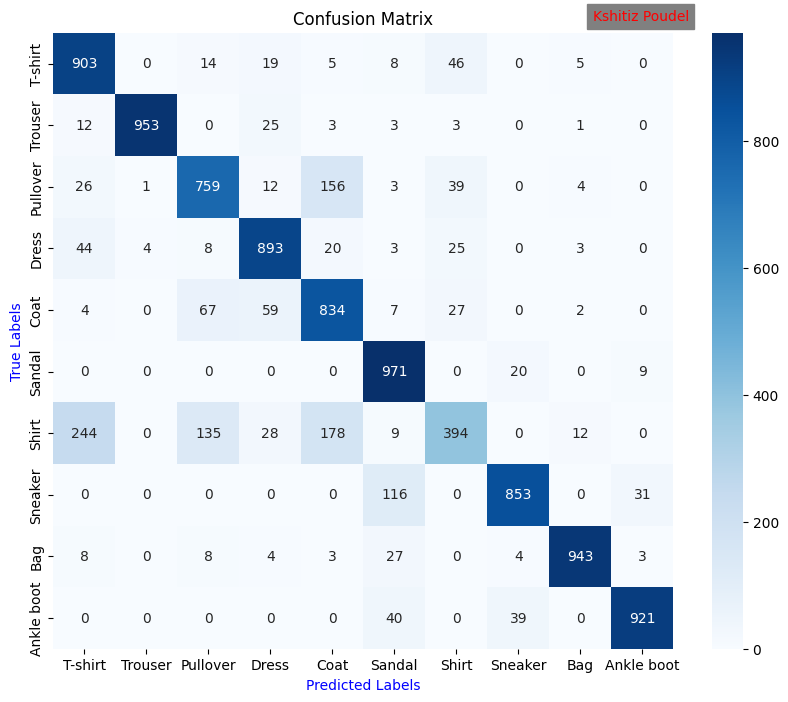

In [90]:
import seaborn as sns
class_labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.text(8.7, -0.2, 'Kshitiz Poudel', color='red', backgroundcolor='gray')
plt.xlabel('Predicted Labels',color='blue')
plt.ylabel('True Labels',color='blue')
plt.show()

plt.show()

In [91]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(test_labels, predicted_labels)

print(report)

              precision    recall  f1-score   support

           0       0.73      0.90      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.77      0.76      0.76      1000
           3       0.86      0.89      0.88      1000
           4       0.70      0.83      0.76      1000
           5       0.82      0.97      0.89      1000
           6       0.74      0.39      0.51      1000
           7       0.93      0.85      0.89      1000
           8       0.97      0.94      0.96      1000
           9       0.96      0.92      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



 **To compare it with similar model trained on full dataset**

In [92]:
model_full= keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model_full.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [93]:
model_full.fit(train_images.reshape(60000,784),train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3699 - accuracy: 0.7726
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4828 - accuracy: 0.8291
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4560 - accuracy: 0.8389
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4263 - accuracy: 0.8487
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3995 - accuracy: 0.8564


In [94]:
#evaluate the test data
test_loss1, test_acc1 = model_full.evaluate(test_images.reshape(10000,784),test_labels)
print('Test accuracy:', test_acc1)
print('Test Loss:', test_loss1)


313/313 [==============================] - 1s 3ms/step - loss: 0.4240 - accuracy: 0.8560
Test accuracy: 0.8560000061988831
Test Loss: 0.42397138476371765


In [95]:
predicted_probability1=model_full.predict(test_images.reshape(10000,784))
predicted_labels1 = np.argmax(predicted_probability1, axis=1)
report1 = classification_report(test_labels, predicted_labels1)
print(report1)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.96      0.97      0.97      1000
           2       0.77      0.72      0.74      1000
           3       0.89      0.83      0.86      1000
           4       0.68      0.87      0.77      1000
           5       0.97      0.93      0.95      1000
           6       0.67      0.59      0.63      1000
           7       0.88      0.98      0.93      1000
           8       0.97      0.95      0.96      1000
           9       0.96      0.90      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



The same model is performing even poorer with full dimensions. Thus PCA removes unnecessary noise and helps focus on relevant features

performance of cnn on full dataset.

In [96]:
from tensorflow.keras import layers

model_cnn = tf.keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(784,)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.fit(train_images.reshape(60000,784), train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 1.1955 - accuracy: 0.8364
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3384 - accuracy: 0.8805
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3122 - accuracy: 0.8883
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2965 - accuracy: 0.8928
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2825 - accuracy: 0.8982


In [97]:
predicted_probability2=model_cnn.predict(test_images.reshape(10000,784))
predicted_labels2 = np.argmax(predicted_probability2, axis=1)
report2 = classification_report(test_labels, predicted_labels2)
print(report2)

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1000
           1       0.98      0.98      0.98      1000
           2       0.75      0.81      0.78      1000
           3       0.90      0.86      0.88      1000
           4       0.75      0.79      0.77      1000
           5       0.98      0.97      0.98      1000
           6       0.66      0.61      0.64      1000
           7       0.96      0.94      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.94      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

